In [2]:
import twstock
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# List of stock symbols
stock_symbols = [
    '2382',
    '3231',
    '2330',
    '3443',
    '3661',
    '3035',
    '2345',
    # '5274',
    # '4966',
    '3711',
    '2308',
    '2301',
    '2385',
    '3017',
    '2368',
    # '6274',
    '3533',
    '2376',
    '6669',
    '2356',
    '2317',
    '2454',
    '6213',
    # '6643'
    ]

print(len(stock_symbols))

# Initialize an empty DataFrame to store closing prices
closing_prices_df = pd.DataFrame()

for symbol in stock_symbols:
    stock = twstock.Stock(symbol)
    # Fetch data from a specific date (e.g., from January 2023 to the present)
    stock.fetch_from(2022, 11)
    # Create a DataFrame from the fetched data
    
    df = pd.DataFrame({
        'date': stock.date,
        symbol: stock.price
    })
    # Set the 'date' column as the index
    df.set_index('date', inplace=True)
    
    print(f'{symbol} {len(df)}')
    # continue
    
    df = df.groupby(pd.Grouper(freq='ME')).last()
    
    
    # Extract the 'close' column and rename it to the stock symbol
    # Join with the main DataFrame
    closing_prices_df = closing_prices_df.join(df, how='outer')
    time.sleep(5)

print(closing_prices_df)

20
2382 548
3231 548
2330 548
3443 548
3661 548
3035 548
2345 548
3711 548
2308 548
2301 548
2385 548
3017 548
2368 548
3533 548
2376 548
6669 548
2356 548
2317 548
2454 548
6213 548
             2382    3231    2330    3443    3661   3035   2345   3711   2308  \
date                                                                            
2022-11-30   71.6   27.65   490.0   731.0   927.0  168.5  271.5   97.2  302.0   
2022-12-31   72.3   29.40   448.5   641.0   788.0  142.5  234.5   93.9  286.5   
2023-01-31   74.7   31.50   522.0   782.0   843.0  169.5  243.5  100.0  289.0   
2023-02-28   80.1   33.15   511.0  1160.0   944.0  185.5  283.0  106.0  286.5   
2023-03-31   89.1   41.85   533.0  1085.0  1240.0  196.5  319.0  112.5  301.0   
2023-04-30   85.9   46.50   502.0   996.0  1185.0  164.0  299.0  101.0  300.0   
2023-05-31  116.5   66.70   558.0  1495.0  1655.0  171.5  353.0  111.5  316.5   
2023-06-30  152.0   90.80   576.0  1605.0  1795.0  211.0  349.0  110.5  344.5   
2023-07

                2382      3231      2330      3443      3661      3035  \
date                                                                     
2022-11-30 -1.731916 -1.975040 -1.070290 -2.038853 -1.555491 -1.326796   
2022-12-31 -1.723251 -1.920229 -1.258683 -2.361444 -1.703524 -1.669620   
2023-01-31 -1.693541 -1.854456 -0.925023 -1.856051 -1.644949 -1.313610   
2023-02-28 -1.626694 -1.802777 -0.974959 -0.501168 -1.537386 -1.102642   
2023-03-31 -1.515283 -1.530288 -0.875088 -0.769994 -1.222149 -0.957601   

                2345      3711      2308      2301      2385      3017  \
date                                                                     
2022-11-30 -1.410979 -1.448476 -0.836496 -1.711981 -1.462608 -1.430525   
2022-12-31 -1.666825 -1.581451 -1.159629 -1.801404 -1.385571 -1.435216   
2023-01-31 -1.604592 -1.335649 -1.107511 -1.672238 -1.372731 -1.463359   
2023-02-28 -1.331459 -1.093877 -1.159629 -1.518232 -1.239200 -1.395346   
2023-03-31 -1.082529 -0.831956 -0.857

C:\Users\nick\AppData\Local\Temp\ipykernel_22040\1688574758.py:23: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  df = df.swapaxes('index', 'columns')


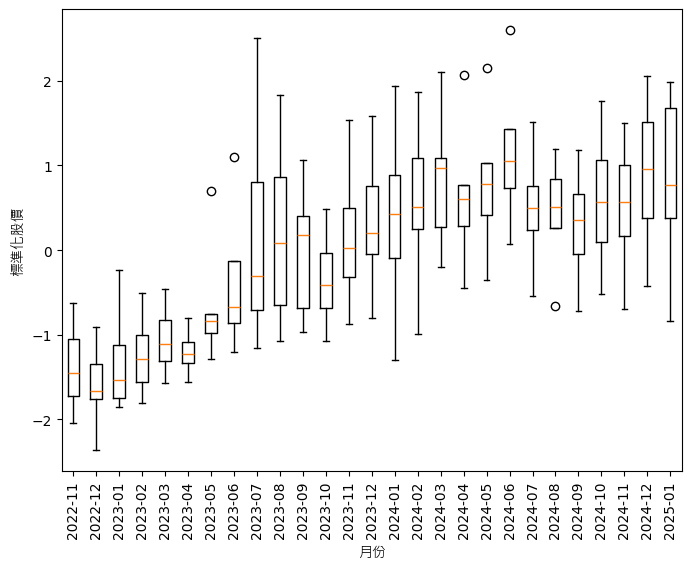

In [3]:
from matplotlib.font_manager import FontProperties as font
import matplotlib.dates as mdates

font1 = font(family='Microsoft JhengHei')

scaler = StandardScaler()
X = scaler.fit_transform(closing_prices_df.to_numpy())
# print(std_df)
std_df = pd.DataFrame(X, index=closing_prices_df.index, columns=closing_prices_df.columns)# Display the DataFrame
print(std_df.head())

# Function to compute boxplot statistics for a row
def compute_boxplot_stats(row):
    q1 = np.percentile(row, 25)
    median = np.percentile(row, 50)
    q3 = np.percentile(row, 75)
    minimum = row.min()
    maximum = row.max()
    return pd.Series({'min': minimum, 'Q1': q1, 'median': median, 'Q3': q3, 'max': maximum})


df = std_df.apply(compute_boxplot_stats, axis=1)[:-1]
df = df.swapaxes('index', 'columns')
print(df)

# Plot the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(df)
# Set x-axis labels to year and month
ax.set_xticklabels([col.strftime('%Y-%m') for col in df.columns], rotation=90)
ax.set_ylabel('標準化股價', fontproperties=font1)
ax.set_xlabel('月份', fontproperties=font1)
plt.show()

In [4]:
import twstock
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize an empty DataFrame to store closing prices
closing_prices_df = pd.DataFrame()

for symbol in stock_symbols:
    stock = twstock.Stock(symbol)
    # Fetch data from a specific date (e.g., from January 2023 to the present)
    stock.fetch_from(2022, 11)
    # Create a DataFrame from the fetched data
    
    df = pd.DataFrame({
        'date': stock.date,
        symbol: stock.price
    })
    # Set the 'date' column as the index
    df.set_index('date', inplace=True)
    
    print(f'{symbol} {len(df)}')
    # continue
    
    # df = df.groupby(pd.Grouper(freq='ME')).last()
    
    
    # Extract the 'close' column and rename it to the stock symbol
    # Join with the main DataFrame
    closing_prices_df = closing_prices_df.join(df, how='outer')
    time.sleep(5)

print(closing_prices_df)

2382 548
3231 548
2330 548
3443 548
3661 548
3035 548
2345 548
3711 548
2308 548
2301 548
2385 548
3017 548
2368 548
3533 548
2376 548
6669 548
2356 548
2317 548
2454 548
6213 548
             2382    3231    2330    3443    3661   3035   2345   3711   2308  \
date                                                                            
2022-11-01   67.0   26.20   391.5   493.5   676.0  146.5  244.0   80.0  261.0   
2022-11-02   67.3   25.95   395.0   508.0   678.0  145.5  242.5   80.0  268.5   
2022-11-03   66.8   25.80   384.0   544.0   701.0  144.0  247.5   79.5  267.0   
2022-11-04   66.7   25.35   382.0   544.0   725.0  142.5  250.0   80.5  269.5   
2022-11-07   67.9   26.80   390.0   575.0   797.0  149.0  249.5   84.5  273.0   
...           ...     ...     ...     ...     ...    ...    ...    ...    ...   
2025-02-06  242.5  103.50  1115.0  1325.0  3350.0  237.5  759.0  161.0  417.0   
2025-02-07  252.0  104.50  1125.0  1380.0  3605.0  240.5  774.0  164.5  415.0   
2025-02-10

                2382      3231      2330      3443      3661      3035  \
date                                                                     
2022-11-01 -1.703708 -1.904120 -1.470753 -2.636196 -1.800273 -1.620692   
2022-11-02 -1.700084 -1.911635 -1.454734 -2.588717 -1.798082 -1.633723   
2022-11-03 -1.706125 -1.916143 -1.505079 -2.470839 -1.772878 -1.653268   
2022-11-04 -1.707333 -1.929670 -1.514233 -2.470839 -1.746578 -1.672814   
2022-11-07 -1.692835 -1.886084 -1.477618 -2.369332 -1.667678 -1.588116   

                2345      3711      2308      2301      2385      3017  \
date                                                                     
2022-11-01 -1.581585 -2.066428 -1.716483 -1.636599 -1.446625 -1.412188   
2022-11-02 -1.592549 -2.066428 -1.548639 -1.651062 -1.451406 -1.405171   
2022-11-03 -1.556002 -2.086469 -1.582207 -1.651062 -1.437064 -1.393478   
2022-11-04 -1.537729 -2.046387 -1.526259 -1.651062 -1.427503 -1.395817   
2022-11-07 -1.541383 -1.886060 -1.447

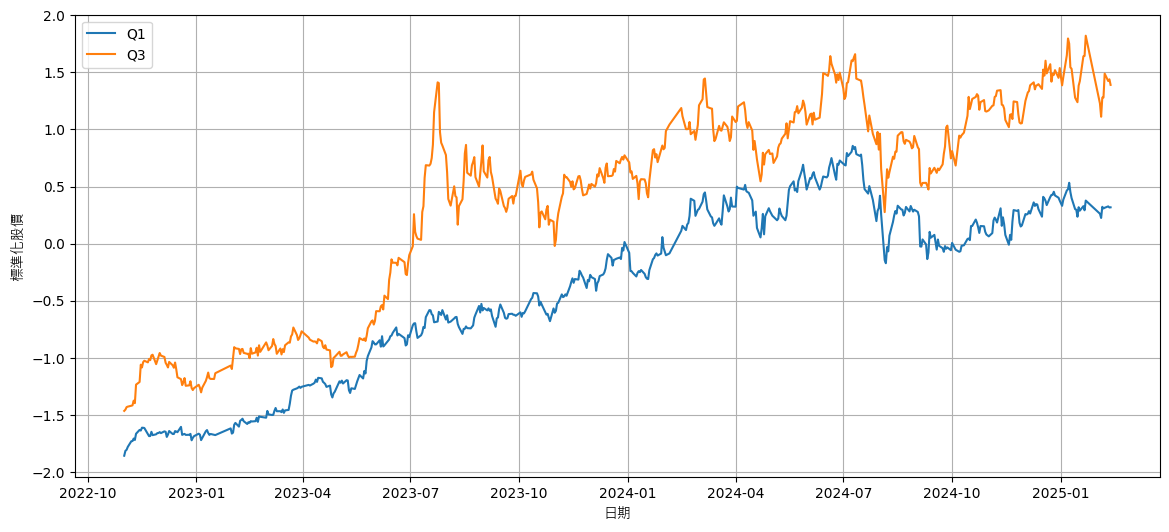

In [10]:
import matplotlib.dates as mdates

scaler = StandardScaler()
X = scaler.fit_transform(closing_prices_df.to_numpy())
# print(std_df)
std_df = pd.DataFrame(X, index=closing_prices_df.index, columns=closing_prices_df.columns)# Display the DataFrame
print(std_df.head())

def avg(row):
    return pd.Series({'mean': row.mean()})

def one_stock(row):
    return pd.Series({'c': row['2330']})

df = std_df.apply(compute_boxplot_stats, axis=1)[['Q1', 'Q3']]
# df = std_df.apply(one_stock, axis=1)
print(df.head())


fig, ax = plt.subplots(figsize=(14, 6))
# Plot each column in df with a label
for column in df.columns:
    ax.plot(df.index, df[column], label=column)

plt.ylabel('標準化股價', fontproperties=font1)
plt.xlabel('日期', fontproperties=font1)
plt.grid(True)
ax.legend()  # Add legend here
plt.show()

# Plot the boxplot
# plt.figure(figsize=(12, 6))
# df[-100:].swapaxes('index', 'columns').boxplot()
# plt.ylabel('標準化股價', fontproperties=font1)
# plt.show()

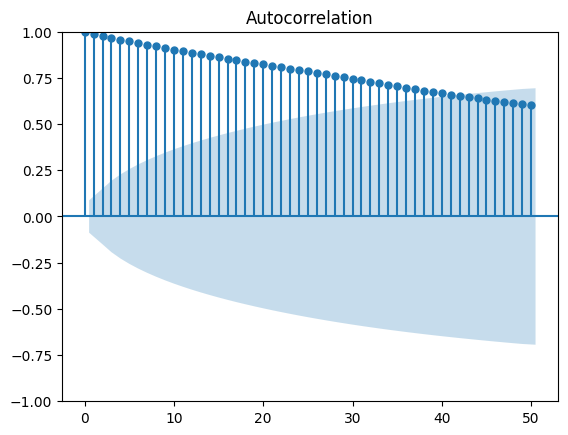

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df["median"], lags=50)